In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data from housing.csv file
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Total number of rows is 20640. All the columns other than total_bedrooms contain 20640 non-null values, it means there are some null values in that column.
#### As the number of null values is less comparatively, lets drop the rows with null values.

In [5]:
#Droppping the null values, keeping inplace true to make changes in original dataframe
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [8]:
#Creating x,y data for the model
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16131,-122.48,37.79,52.0,4683.0,1055.0,2246.0,975.0,4.1148,NEAR BAY,457800.0
19084,-122.55,38.42,24.0,2220.0,411.0,894.0,365.0,4.2891,<1H OCEAN,211700.0
18152,-122.05,37.37,35.0,1365.0,256.0,662.0,262.0,5.6533,<1H OCEAN,291400.0
2981,-119.02,35.33,26.0,3691.0,826.0,2072.0,827.0,2.1553,INLAND,84700.0
1397,-122.07,37.96,34.0,1692.0,290.0,836.0,289.0,5.0172,NEAR BAY,197100.0
...,...,...,...,...,...,...,...,...,...,...
8270,-118.15,33.77,39.0,2428.0,634.0,1312.0,612.0,2.7212,NEAR OCEAN,266300.0
12428,-116.21,33.68,34.0,584.0,176.0,625.0,166.0,1.5809,INLAND,100000.0
6830,-118.11,34.07,46.0,1130.0,229.0,698.0,209.0,5.2719,<1H OCEAN,244400.0
20248,-119.23,34.25,28.0,26.0,3.0,29.0,9.0,8.0000,NEAR OCEAN,275000.0


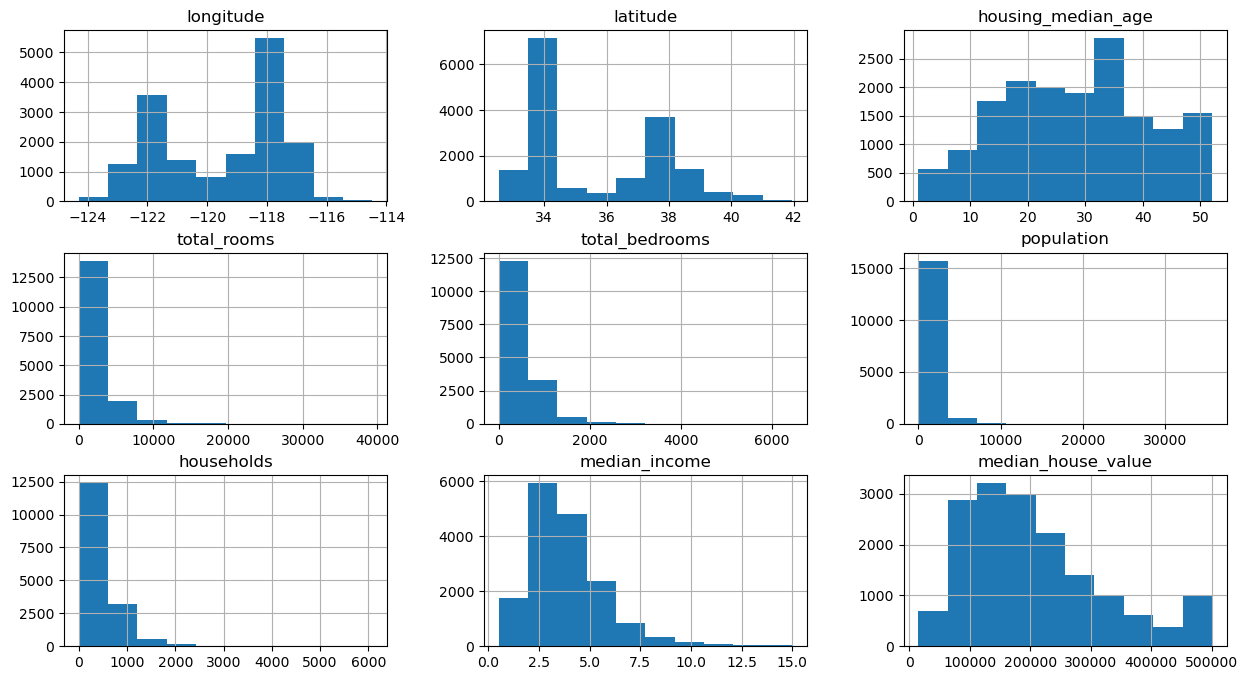

In [14]:
train_data.hist(figsize=(15,8))
plt.show()

In [15]:
train_data.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924364,-0.108720,0.047234,0.072564,0.099706,0.059462,-0.011915,-0.040978
latitude,-0.924364,1.000000,0.011997,-0.038752,-0.070207,-0.108135,-0.074162,-0.082949,-0.148645
housing_median_age,-0.108720,0.011997,1.000000,-0.362868,-0.320960,-0.294658,-0.304094,-0.122356,0.098883
total_rooms,0.047234,-0.038752,-0.362868,1.000000,0.930082,0.854751,0.918839,0.194492,0.131209
total_bedrooms,0.072564,-0.070207,-0.320960,0.930082,1.000000,0.875530,0.980550,-0.009670,0.047888
population,0.099706,-0.108135,-0.294658,0.854751,0.875530,1.000000,0.904237,0.003693,-0.025849
households,0.059462,-0.074162,-0.304094,0.918839,0.980550,0.904237,1.000000,0.011056,0.063397
median_income,-0.011915,-0.082949,-0.122356,0.194492,-0.009670,0.003693,0.011056,1.000000,0.687792
median_house_value,-0.040978,-0.148645,0.098883,0.131209,0.047888,-0.025849,0.063397,0.687792,1.000000


<Axes: >

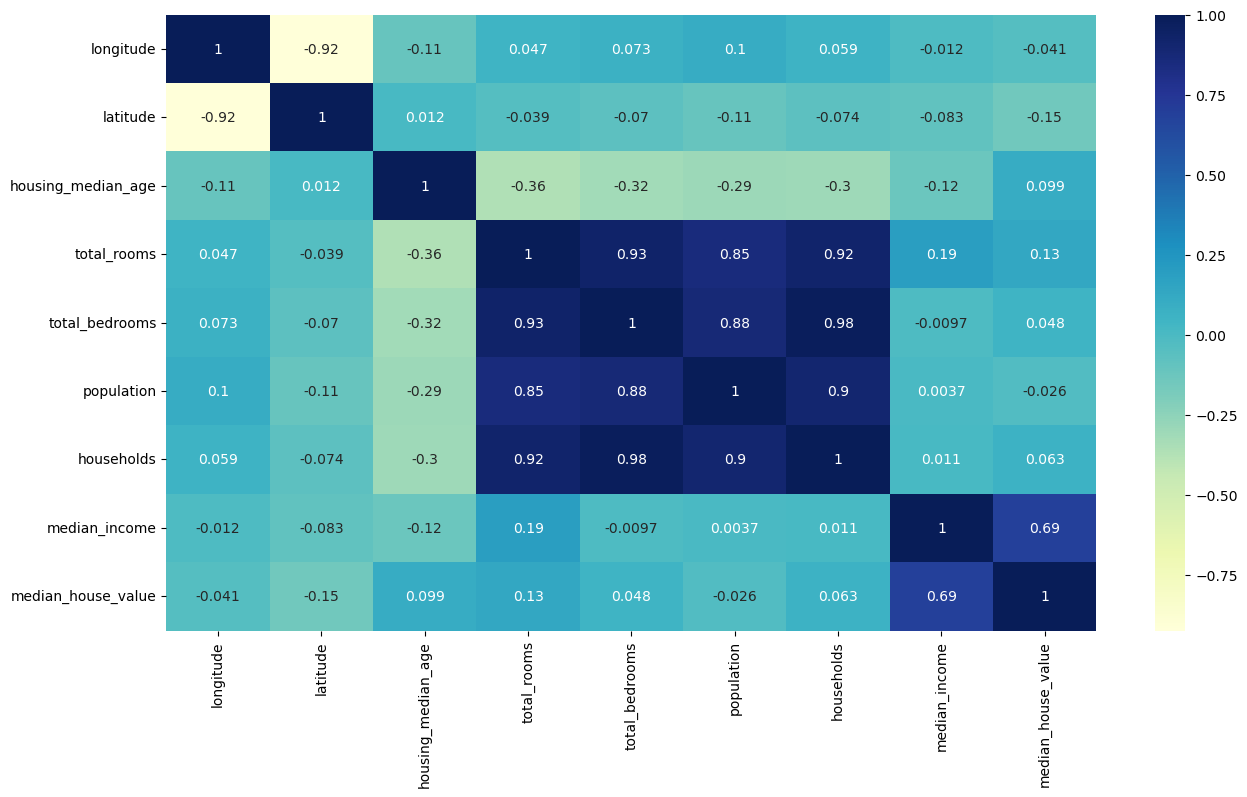

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

In [36]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log(train_data['population'] * 1)
train_data['households'] = np.log(train_data['households'] * 1)

/Users/shubhamk/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


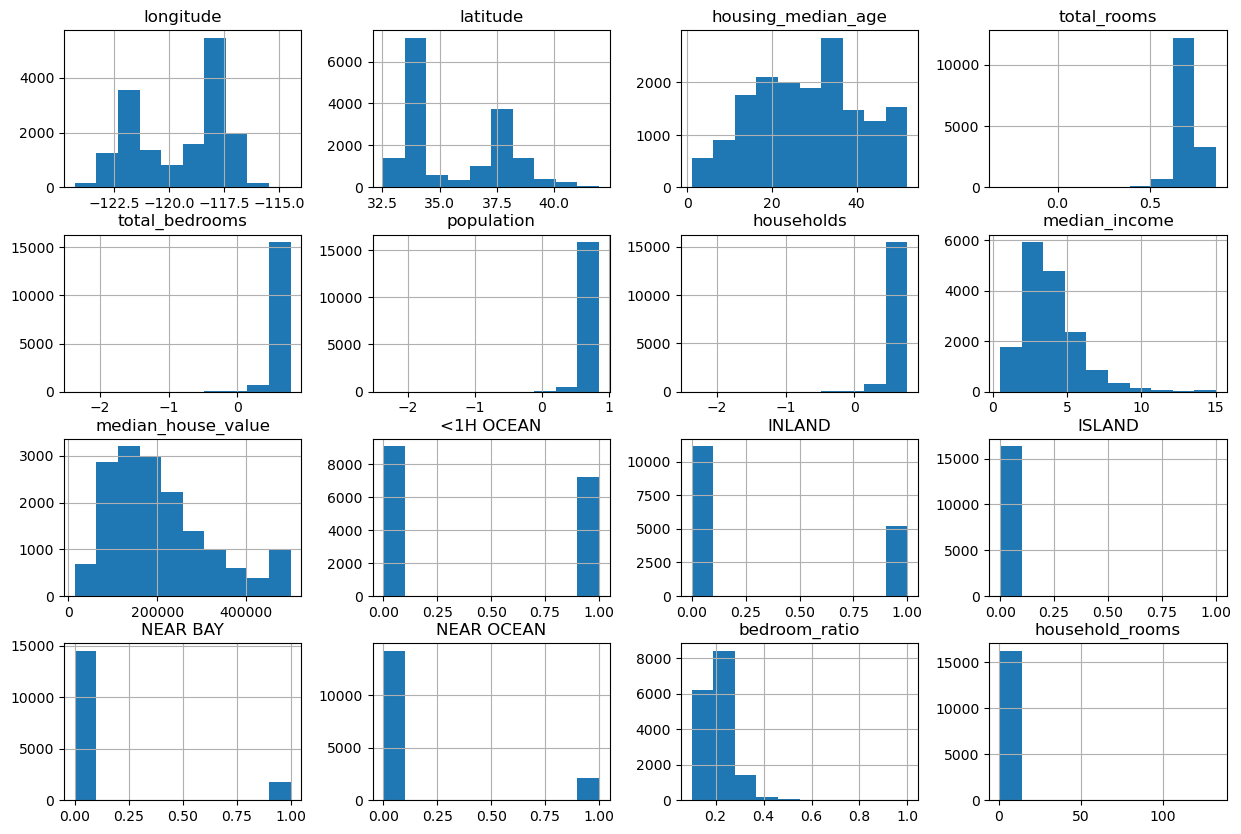

In [37]:

train_data.hist(figsize=(15,10))
plt.show()

#### Done with data exploring. Now, lets start data preprocessing.

In [17]:
#Using pandas one hot encoding
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16131,0,0,0,1,0
19084,1,0,0,0,0
18152,1,0,0,0,0
2981,0,1,0,0,0
1397,0,0,0,1,0
...,...,...,...,...,...
8270,0,0,0,0,1
12428,0,1,0,0,0
6830,1,0,0,0,0
20248,0,0,0,0,1


In [18]:
#Joining the dummies with training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16131,-122.48,37.79,52.0,4683.0,1055.0,2246.0,975.0,4.1148,457800.0,0,0,0,1,0
19084,-122.55,38.42,24.0,2220.0,411.0,894.0,365.0,4.2891,211700.0,1,0,0,0,0
18152,-122.05,37.37,35.0,1365.0,256.0,662.0,262.0,5.6533,291400.0,1,0,0,0,0
2981,-119.02,35.33,26.0,3691.0,826.0,2072.0,827.0,2.1553,84700.0,0,1,0,0,0
1397,-122.07,37.96,34.0,1692.0,290.0,836.0,289.0,5.0172,197100.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,-118.15,33.77,39.0,2428.0,634.0,1312.0,612.0,2.7212,266300.0,0,0,0,0,1
12428,-116.21,33.68,34.0,584.0,176.0,625.0,166.0,1.5809,100000.0,0,1,0,0,0
6830,-118.11,34.07,46.0,1130.0,229.0,698.0,209.0,5.2719,244400.0,1,0,0,0,0
20248,-119.23,34.25,28.0,26.0,3.0,29.0,9.0,8.0000,275000.0,0,0,0,0,1


<Axes: >

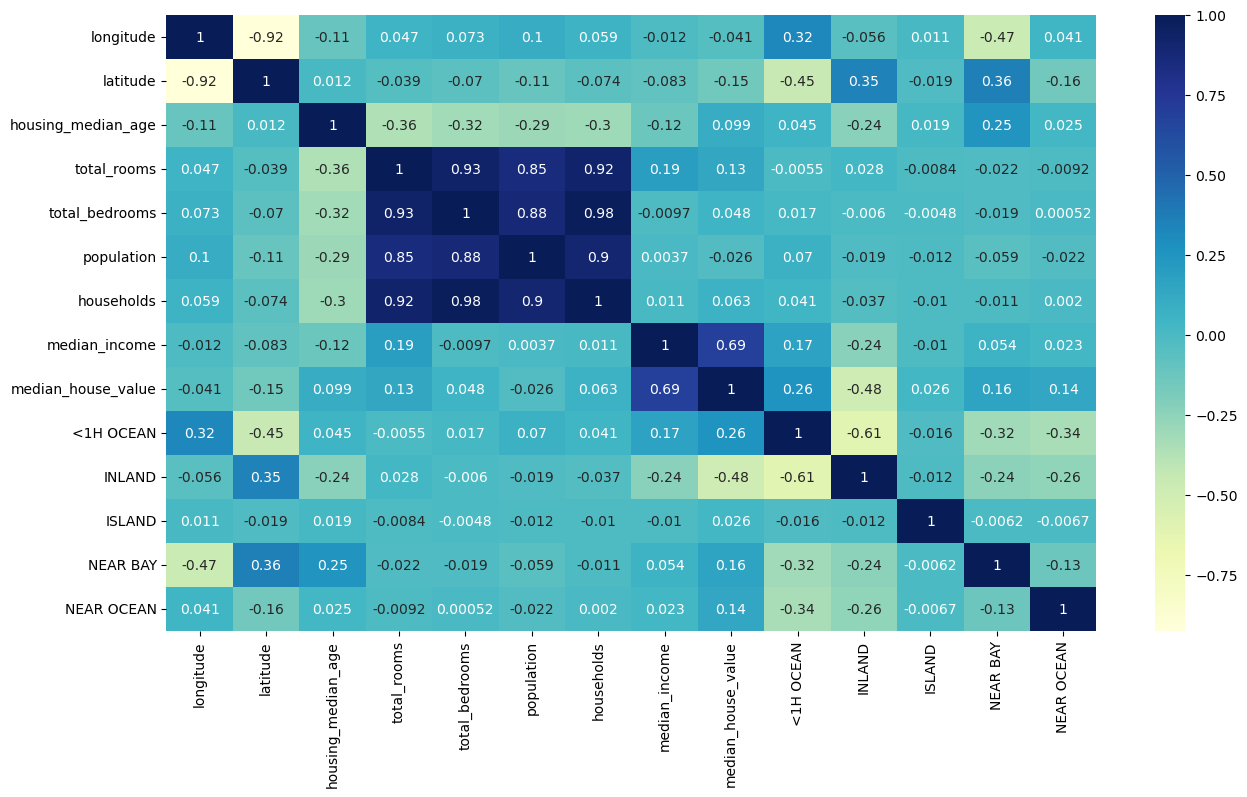

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

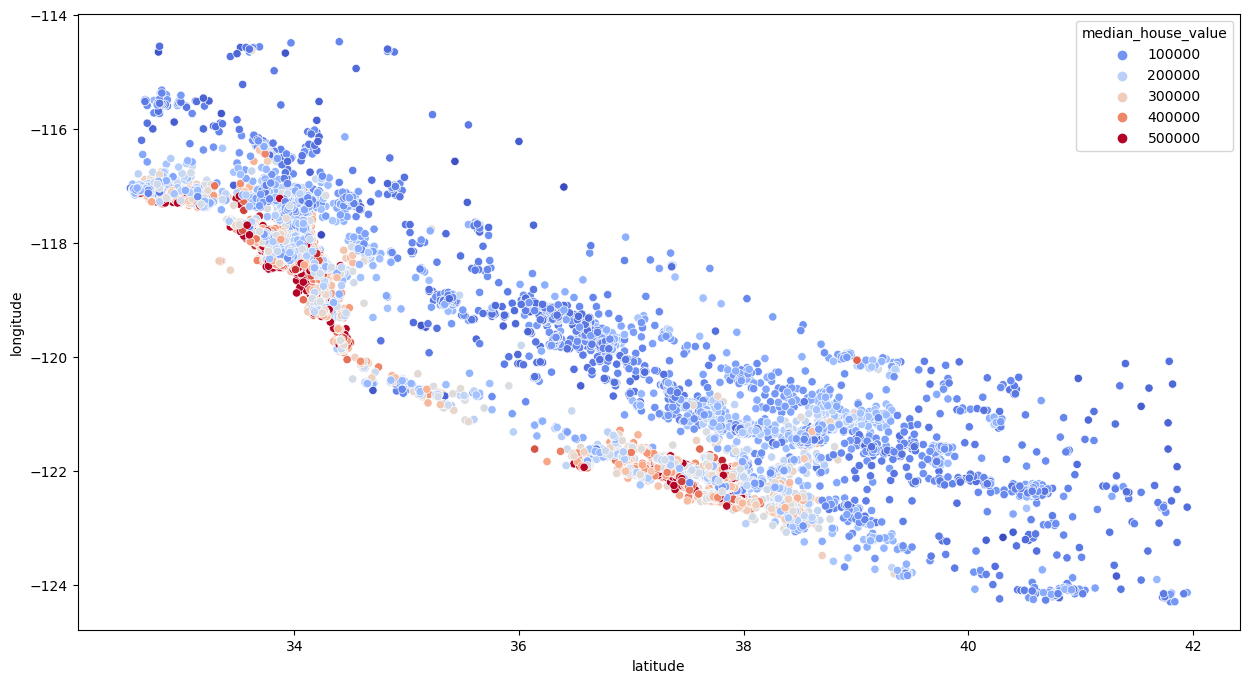

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

#### Here, we can see the houses near the coastline have higher median house value as compared to the ones in inland area.

#### Started with feature engineering

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16131,-122.48,37.79,52.0,4683.0,1055.0,2246.0,975.0,4.1148,457800.0,0,0,0,1,0,0.225283,4.803077
19084,-122.55,38.42,24.0,2220.0,411.0,894.0,365.0,4.2891,211700.0,1,0,0,0,0,0.185135,6.082192
18152,-122.05,37.37,35.0,1365.0,256.0,662.0,262.0,5.6533,291400.0,1,0,0,0,0,0.187546,5.209924
2981,-119.02,35.33,26.0,3691.0,826.0,2072.0,827.0,2.1553,84700.0,0,1,0,0,0,0.223788,4.463120
1397,-122.07,37.96,34.0,1692.0,290.0,836.0,289.0,5.0172,197100.0,0,0,0,1,0,0.171395,5.854671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,-118.15,33.77,39.0,2428.0,634.0,1312.0,612.0,2.7212,266300.0,0,0,0,0,1,0.261120,3.967320
12428,-116.21,33.68,34.0,584.0,176.0,625.0,166.0,1.5809,100000.0,0,1,0,0,0,0.301370,3.518072
6830,-118.11,34.07,46.0,1130.0,229.0,698.0,209.0,5.2719,244400.0,1,0,0,0,0,0.202655,5.406699
20248,-119.23,34.25,28.0,26.0,3.0,29.0,9.0,8.0000,275000.0,0,0,0,0,1,0.115385,2.888889


<Axes: >

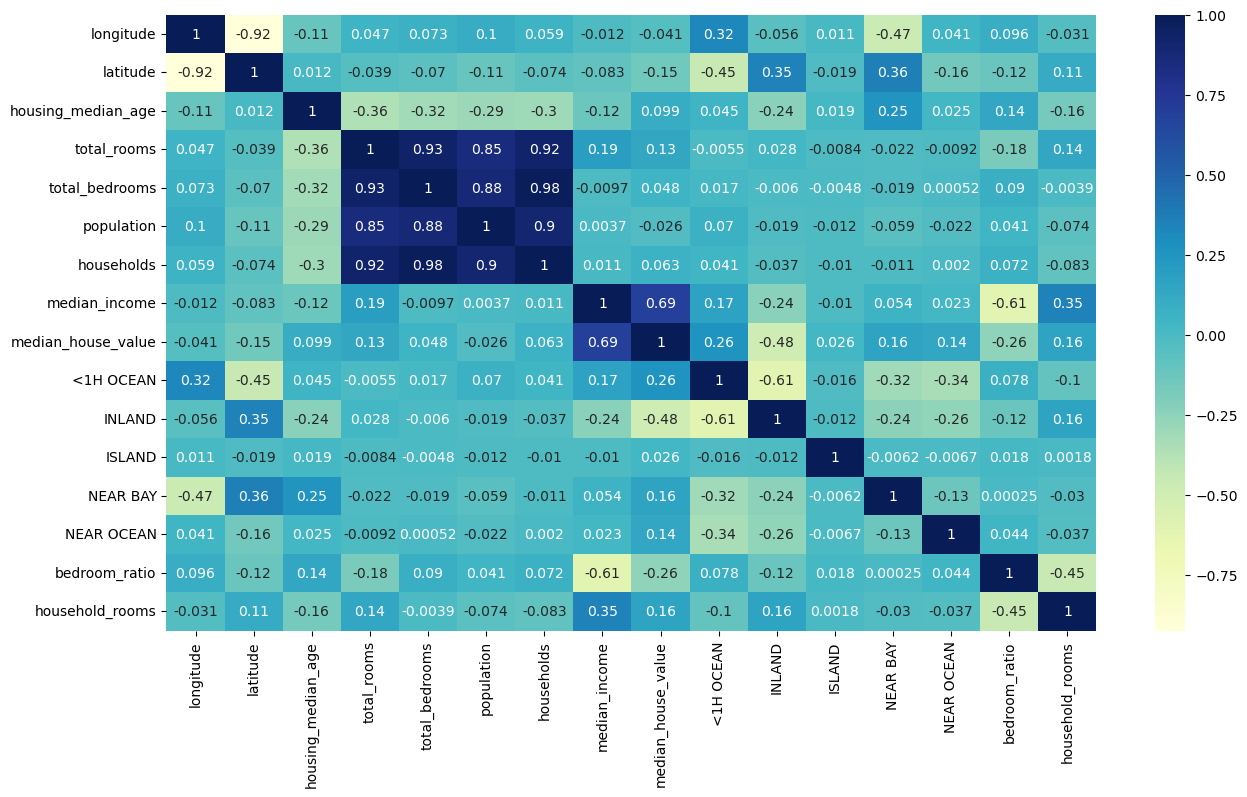

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#### We are done with feature engineering. lets, train some models on the data. Firstly we will start with simple linear regression.

In [25]:
#Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [28]:
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_data = X_train.join(y_train)

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']